### aim: 

### date: 

In [98]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [99]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [100]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

In [101]:
tdir = '/gpfs/data/greenocean/RECCAP-2/surface_co2/'

reccap = {
    "AOML": {
        "filepath": "AOML_EXTRAT_v20211130/",
        "filename": "fgco2_AOML_EXTRAT_1997-2020_v20211018.nc4"
    },
    "UOEX": {
        "filepath": "UOEX_Wat20_1985_2019_v20211204/",
        "filename": "fgco2_UOEX_Wat20_1985-2019_v20211204.nc"
    },
    "CMEMS": {
        "filepath": "CMEMS-LSCE-FFNN_v20210709/",
        "filename": "fgco2_CMEMS-LSCE-FFNN_1985-2018_v20210709.nc"
    },
    "LDEOHPD": {
        "filepath": "spco2_LDEO_HPD_1985-2018_v20211210/",
        "filename": "fgco2_LDEO_HPD_1985-2018_v20211210.nc"
    },
    "CSIRML6": {
        "filepath": "CSIRML6_v20211117/",
        "filename": "fgco2_CSIRML6_1985-2018_v20211117.nc"
    },
    "JenaMLS": {
        "filepath": "JenaMLS_v20211126//",
        "filename": "fgco2_JenaMLS_1985-2018_v20211126.nc"
    },
    "JMAMLR": {
        "filepath": "JMAMLR_v20211208/",
        "filename": "fgco2_JMAMLR_1985-2019_v20211208.nc"
    },
    "LDEO": {
        "filepath": "LDEO_2021_clim_RECCAP2_v20210702/",
        "filename": "LDEO_2021_clim_RECCAP2_avg_socat.nc" #this one may be out for the time being
    },
    "NIES": {
        "filepath": "NIES-ML3_v20220222/",
        "filename": "fgco2_NIES-ML3_1980-2020_v20220222.nc"
    },
    "SODAETHZ": {
        "filepath": "OceanSODAETHZ_v20211207//",
        "filename": "fgco2_OceanSODAETHZ_1985-2018_v20211207.nc"
    },
    "SOMFFN": {
        "filepath": "SOMFFN_v20211121/",
        "filename": "fgco2_MPI_SOMFFN_1982-2019_v20211121.nc"
    },

}

In [102]:
tl = list(reccap.keys())

In [103]:
tl = ['AOML',
 'UOEX',
 'CMEMS',
 'LDEOHPD',
 'CSIRML6',
 'JenaMLS',
 'JMAMLR',
 'LDEO',
 'NIES',
 'SODAETHZ',
 'SOMFFN']

### faffy way to standardize dates argh

In [104]:
# tl = ['AOML',
#  'UOEX',
#  'CMEMS',
#  'LDEOHPD',
#  'CSIRML6',
#  'JenaMLS',
#  'JMAMLR',
#  # 'LDEO',
#  'NIES',
#  'SODAETHZ',
#  'SOMFFN'
#      ]
    #AOML CMEMS
tl = ['CMEMS']
tl = []

for tp in tl:
    
    print(tp)
    fp = reccap[tp]["filepath"]
    fn = reccap[tp]["filename"]
    print(fn)


    w = xr.open_dataset(f'{tdir}{fp}{fn}')
    print(w)
    print(w.time)
    
    
    # # cftime_dates = w.time
    # #datetime_index = pd.DatetimeIndex(w.time.values)
    # datetime_list = [pd.Timestamp(date.isoformat()) for date in w.time.values]
    # datetime_index = pd.DatetimeIndex(datetime_list)
    #times = pd.date_range(f"1985/01/01",f"2019/01/01",freq='MS',closed='left')
    # print(len(times))
    #print(times)
    #w = w.assign_coords(time=times)
    # w = w.rename({'latitude': 'lat'})
    # w = w.rename({'longitude': 'lon'})
    # print(fn)
    # print(w)
    w = w.rename({'latitude': 'lat'})
    w = w.rename({'longitude': 'lon'})
    fn2 = f'STANDATE_{fn}'
    print(fn2)
    print(w)
    w.to_netcdf(f'{tdir}{fp}{fn2}')


## checking

## JMAMLR is only from 60 - remade to not include 0s from 1980 argh why did you do it like this

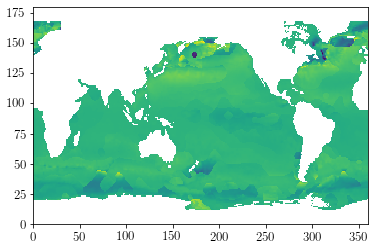

In [105]:
tdir = '/gpfs/data/greenocean/RECCAP-2/surface_co2/UOEX_Wat20_1985_2019_v20211204'
w = xr.open_dataset(f'{tdir}/fgco2_UOEX_Wat20_1985-2019_v20211204.nc')
plt.pcolormesh(w['fgco2'][0,:,:])

2.7723024e-07
1997-09-01T00:00:00.000000000
-1.17200884e-07

4.2615699104804486e-07
1985-01-01T00:00:00.000000000
-7.589955943390244e-07

2.4783694e-07
1985-01-15 00:00:00
-3.0666098e-07

2.6496408421528163e-07
1985-01-01T00:00:00.000000000
-3.6749967606496755e-07

2.2508024e-07
1985-01-01T00:00:00.000000000
-3.974516e-07

3.7904869e-07
1985-01-01T00:00:00.000000000
-3.3573866e-07

2.8036354e-07
1985-01-01T00:00:00.000000000
-3.954103e-07

2.71696e-07
1980-01-01T00:00:00.000000000
-1.845923e-07

2.553272852478161e-07
1985-01-01T00:00:00.000000000
-2.5364366529822494e-07

3.2484252e-07
1982-01-01T00:00:00.000000000
-3.5015586e-07



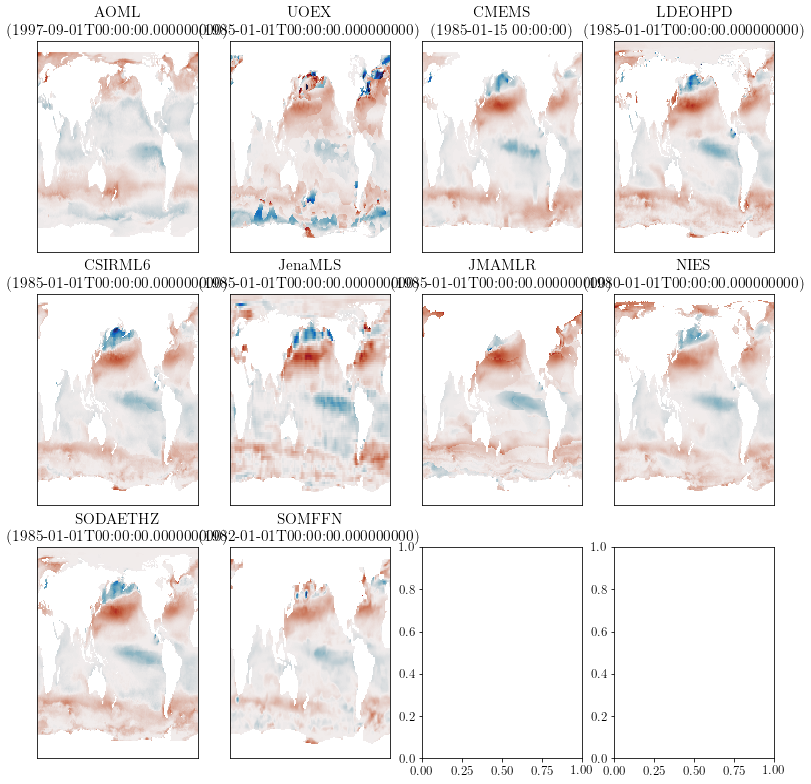

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [106]:
tdir = '/gpfs/data/greenocean/RECCAP-2/surface_co2/'
tl = ['AOML',
 'UOEX',
 'CMEMS',
 'LDEOHPD',
 'CSIRML6',
 'JenaMLS',
 'JMAMLR',
 # 'LDEO',
 'NIES',
 'SODAETHZ',
 'SOMFFN'
     ]


# tl = ['SOMFFN']

fact = 1.1
fig, axs = plt.subplots(3,4, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0

for tp in tl:
    
    # print(tp)
    
    fp = reccap[tp]["filepath"]
    fn = reccap[tp]["filename"]
    # print(fn)

    
    w = xr.open_dataset(f'{tdir}{fp}/STANDATE_{fn}')

    plt.figure()
    axs[ind].pcolormesh(w.fgco2[0,:,:], vmin = -4e-7, vmax = 4e-7, cmap = cm.balance)
    print(np.nanmax(w.fgco2[0,:,:]))
    print(w.time[0].values)
    print(np.nanmin(w.fgco2[0,:,:]))
    axs[ind].set_title(f'{tp} \n ({w.time[0].values})' )
    print()
    axs[ind].set_xticks([])
    axs[ind].set_yticks([])
    ind = ind+1
    
plt.tight_layout()
    


In [107]:
w.fgco2

<xarray.DataArray 'fgco2' (time: 456, lat: 180, lon: 360)>
[29548800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes:
    long_name:      CO2 flux smoothed
    standard_name:  CO2 flux smoothed
    units:          mol/m2/s

## extract timeseries of fgco2

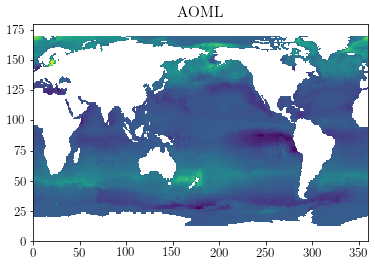

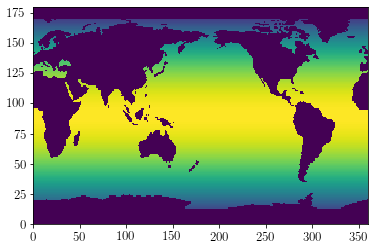

In [126]:
tl = ['AOML',
 'UOEX',
 'CMEMS',
 'LDEOHPD',
 'CSIRML6',
 'JenaMLS',
 'JMAMLR',
 # 'LDEO',
 'NIES',
 'SODAETHZ',
 'SOMFFN'
     ]

tl = ['AOML']

tdir = '/gpfs/data/greenocean/RECCAP-2/surface_co2/'

ex = True
if ex:

    for tp in tl:

        # print(tp)

        fp = reccap[tp]["filepath"]
        fn = reccap[tp]["filename"]

        w = xr.open_dataset(f'{tdir}{fp}/STANDATE_{fn}')

        plt.figure()
        plt.pcolormesh(w.fgco2[0,:,:])
        plt.title(tp)

        savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
        cdomask = xr.open_dataset(savenam)
        sizma = cdomask.tmask_noland.values
        tmask = np.zeros([180,360]); tmask[:] = 1
        ta = (w.fgco2[0,:,:]).values
        tmask[np.where(np.isnan(ta))] = 0
        weights = tmask *sizma

        plt.figure()
        plt.pcolormesh(weights)


        weights_da = xr.DataArray(weights, dims=['lat', 'lon'], coords={'lat': w['lat'], 'lon': w['lon']})

        # Add the weights DataArray to the dataset
        w['weights'] = weights_da

#         co2_w = w.fgco2.isel(lat = slice(0,40)).weighted(w.weights.isel(lat = slice(0,40)))
#         weighted_mean = co2_w.mean(("lon", "lat"))
#         weighted_mean.name = 'fgco2'
#         dataset = weighted_mean.to_dataset()
#         try:
#             dataset.to_netcdf(f'{tdir}{fp}/{tp}_fgco2_90s-50s.nc')
#         except:
#             print('no save')

#         co2_w = w.fgco2.isel(lat = slice(37,49)).weighted(w.weights.isel(lat = slice(37,49)))
#         weighted_mean = co2_w.mean(("lon", "lat"))
#         weighted_mean.name = 'fgco2'
#         dataset = weighted_mean.to_dataset()
#         try:
#             dataset.to_netcdf(f'{tdir}{fp}/{tp}_fgco2_band.nc')
#         except:
#             print('no save')

#         co2_w = w.fgco2.isel(lat = slice(0,60)).weighted(w.weights.isel(lat = slice(0,60)))
#         weighted_mean = co2_w.mean(("lon", "lat"))
#         weighted_mean.name = 'fgco2'
#         dataset = weighted_mean.to_dataset()
#         try:
#             dataset.to_netcdf(f'{tdir}{fp}/{tp}_fgco2_90s-30s.nc') 
#         except:
#             print('no save')

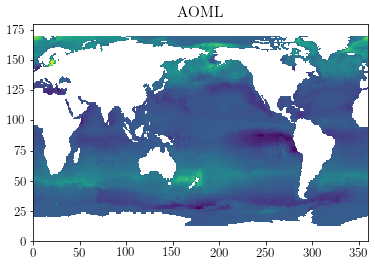

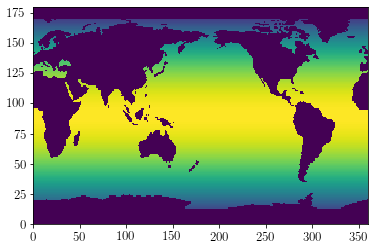

In [127]:
fp = reccap[tp]["filepath"]
fn = reccap[tp]["filename"]

w = xr.open_dataset(f'{tdir}{fp}/STANDATE_{fn}')

plt.figure()
plt.pcolormesh(w.fgco2[0,:,:])
plt.title(tp)

savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
cdomask = xr.open_dataset(savenam)
sizma = cdomask.tmask_noland.values
tmask = np.zeros([180,360]); tmask[:] = 1
ta = (w.fgco2[0,:,:]).values
tmask[np.where(np.isnan(ta))] = 0
weights = tmask *sizma

plt.figure()
plt.pcolormesh(weights)


weights_da = xr.DataArray(weights, dims=['lat', 'lon'], coords={'lat': w['lat'], 'lon': w['lon']})

# Add the weights DataArray to the dataset
w['weights'] = weights_da

In [120]:
weights

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [128]:
import xarray as xr
savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
cdomask = xr.open_dataset(savenam)
print(cdomask.lat.isel(lat = slice(37,49)))

<xarray.DataArray 'lat' (lat: 12)>
array([-52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5,
       -42.5, -41.5])
Coordinates:
  * lat      (lat) float64 -52.5 -51.5 -50.5 -49.5 ... -44.5 -43.5 -42.5 -41.5


Text(0.5, 1.0, 'band between 2 trees (~52s - ~42s) reccap')

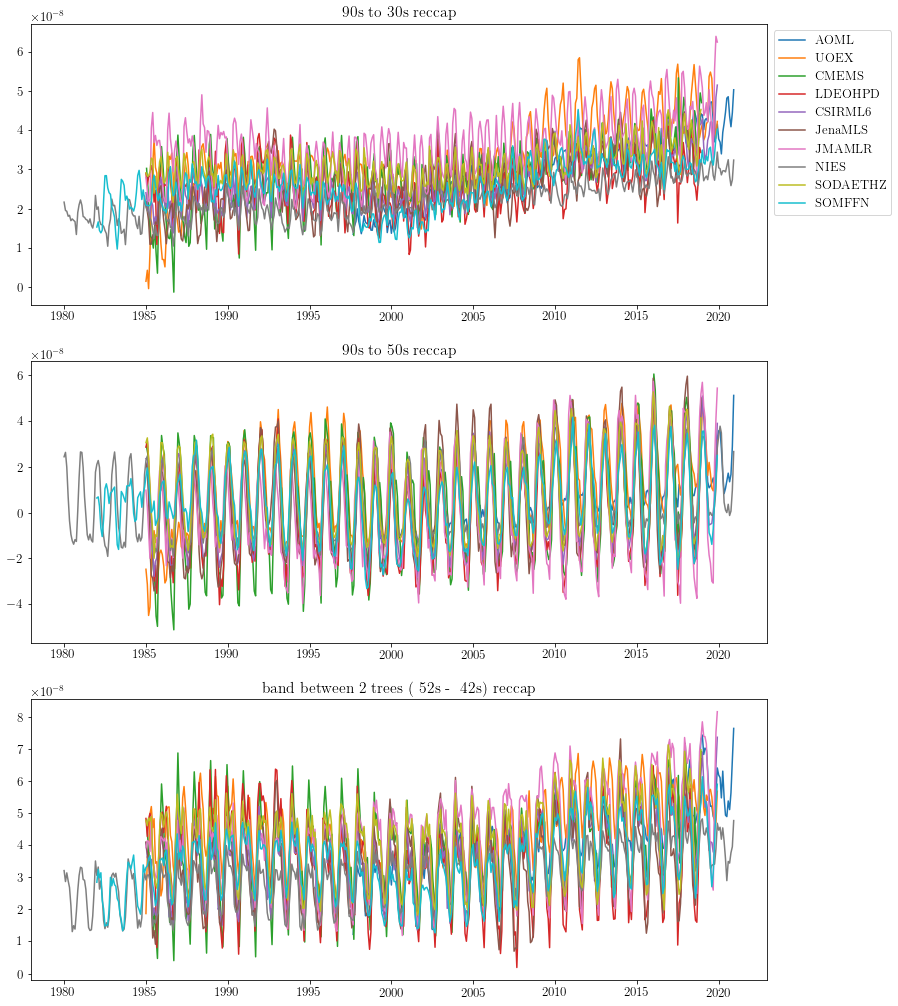

In [111]:
tl = ['AOML',
 'UOEX',
 'CMEMS',
 'LDEOHPD',
 'CSIRML6',
 'JenaMLS',
 'JMAMLR',
 # 'LDEO',
 'NIES',
 'SODAETHZ',
 'SOMFFN'
     ]

tdir = '/gpfs/data/greenocean/RECCAP-2/surface_co2/'


fact = 1.1
fig, axs = plt.subplots(3,1, figsize=(12*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for tp in tl:

    fp = reccap[tp]["filepath"]
    fn = reccap[tp]["filename"]
    f_50s = xr.open_dataset(f'{tdir}{fp}/{tp}_fgco2_90s-50s.nc')
    f_band = xr.open_dataset(f'{tdir}{fp}/{tp}_fgco2_band.nc')
    f_30s = xr.open_dataset(f'{tdir}{fp}/{tp}_fgco2_90s-30s.nc')
    
    axs[0].plot(f_30s.time, f_30s.fgco2, label = f'{tp}')
    axs[1].plot(f_50s.time, f_50s.fgco2)
    axs[2].plot(f_band.time, f_band.fgco2)
axs[0].legend(bbox_to_anchor = ([1,1]))
axs[0].set_title('90s to 30s reccap')
axs[1].set_title('90s to 50s reccap')
axs[2].set_title('band between 2 trees (~52s - ~42s) reccap')

## reorganize fgco2 data into one dataset

In [112]:
import pandas as pd

tl = ['AOML',
 'UOEX',
 'CMEMS',
 'LDEOHPD',
 'CSIRML6',
 'JenaMLS',
 'JMAMLR',
 # 'LDEO',
 'NIES',
 'SODAETHZ',
 'SOMFFN'
     ]

tdir = '/gpfs/data/greenocean/RECCAP-2/surface_co2/'


for tp in tl:

    fp = reccap[tp]["filepath"]

    f_band = xr.open_dataset(f'{tdir}{fp}/{tp}_fgco2_band.nc')


    
    #axs[2].plot(f_band.time, f_band.fgco2)
    
    #plt.legend(bbox_to_anchor = [1,1])
    data = {
        'time': f_band.time,
        'fgco2': f_band.fgco2,
 
    }
    
    df = pd.DataFrame(data)
    print(tp)
    df.to_csv(f'./RECCAP_{tp}.csv')
    
# axs[0].legend(bbox_to_anchor = ([1,1]))
# axs[0].set_title('90s to 30s reccap')
# axs[1].set_title('90s to 50s reccap')
# axs[2].set_title('band between 2 trees (~52s - ~42s) reccap')

AOML
UOEX
CMEMS
LDEOHPD
CSIRML6
JenaMLS
JMAMLR
NIES
SODAETHZ
SOMFFN


In [113]:
import pandas as pd

tl = ['AOML',
 'UOEX',
 'CMEMS',
 'LDEOHPD',
 'CSIRML6',
 'JenaMLS',
 'JMAMLR',
 # 'LDEO',
 'NIES',
 'SODAETHZ',
 'SOMFFN'
     ]

tdir = '/gpfs/data/greenocean/RECCAP-2/surface_co2/'

tp = 'AOML'
fp = reccap[tp]["filepath"]
AOML = xr.open_dataset(f'{tdir}{fp}/{tp}_fgco2_band.nc')
AOML = AOML.rename_vars({"fgco2": "fgco2_AOML"})

tp = 'UOEX'
fp = reccap[tp]["filepath"]
UOEX = xr.open_dataset(f'{tdir}{fp}/{tp}_fgco2_band.nc')
UOEX = UOEX.rename_vars({"fgco2": "fgco2_UOEX"})

tp = 'CMEMS'
fp = reccap[tp]["filepath"]
CMEMS = xr.open_dataset(f'{tdir}{fp}/{tp}_fgco2_band.nc')
CMEMS = CMEMS.rename_vars({"fgco2": "fgco2_CMEMS"})

tp = 'LDEOHPD'
fp = reccap[tp]["filepath"]
LDEOHPD = xr.open_dataset(f'{tdir}{fp}/{tp}_fgco2_band.nc')
LDEOHPD = LDEOHPD.rename_vars({"fgco2": "fgco2_LDEOHPD"})

tp = 'JenaMLS'
fp = reccap[tp]["filepath"]
JenaMLS = xr.open_dataset(f'{tdir}{fp}/{tp}_fgco2_band.nc')
JenaMLS = JenaMLS.rename_vars({"fgco2": "fgco2_JenaMLS"})

tp = 'JMAMLR'
fp = reccap[tp]["filepath"]
JMAMLR = xr.open_dataset(f'{tdir}{fp}/{tp}_fgco2_band.nc')
JMAMLR = JMAMLR.rename_vars({"fgco2": "fgco2_JMAMLR"})

tp = 'NIES'
fp = reccap[tp]["filepath"]
NIES = xr.open_dataset(f'{tdir}{fp}/{tp}_fgco2_band.nc')
NIES = NIES.rename_vars({"fgco2": "fgco2_NIES"})

tp = 'CSIRML6'
fp = reccap[tp]["filepath"]
CSIRML6 = xr.open_dataset(f'{tdir}{fp}/{tp}_fgco2_band.nc')
CSIRML6 = CSIRML6.rename_vars({"fgco2": "fgco2_CSIRML6"})

tp = 'SODAETHZ'
fp = reccap[tp]["filepath"]
SODAETHZ = xr.open_dataset(f'{tdir}{fp}/{tp}_fgco2_band.nc')
SODAETHZ = SODAETHZ.rename_vars({"fgco2": "fgco2_SODAETHZ"})

tp = 'SOMFFN'
fp = reccap[tp]["filepath"]
SOMFFN = xr.open_dataset(f'{tdir}{fp}/{tp}_fgco2_band.nc')
SOMFFN = SOMFFN.rename_vars({"fgco2": "fgco2_SOMFFN"})


# Merge the datasets along the 'time' dimension
#combined = xr.merge([UOEX, AOML])
    
combined = xr.merge([AOML,
 UOEX,
 CMEMS,
 LDEOHPD,
 CSIRML6,
 JenaMLS,
 JMAMLR,
 # LDEO,
 NIES,
 SODAETHZ,
 SOMFFN
     ])
    #axs[2].plot(f_band.time, f_band.fgco2)
    
    #plt.legend(bbox_to_anchor = [1,1])
#     data = {
#         'time': f_band.time,
#         'fgco2': f_band.fgco2,
 
#     }
    
#     df = pd.DataFrame(data)
#     print(tp)
#     df.to_csv(f'./RECCAP_{tp}.csv')
    
# axs[0].legend(bbox_to_anchor = ([1,1]))
# axs[0].set_title('90s to 30s reccap')
# axs[1].set_title('90s to 50s reccap')
# axs[2].set_title('band between 2 trees (~52s - ~42s) reccap')

In [114]:
import pandas as pd

ind = 9

tl = ['AOML',
 'UOEX',
 'CMEMS',
 'LDEOHPD',
 'CSIRML6',
 'JenaMLS',
 'JMAMLR',
 # 'LDEO',
 'NIES',
 'SODAETHZ',
 'SOMFFN'
     ]

tdir = '/gpfs/data/greenocean/RECCAP-2/surface_co2/'
savar = '/gpfs/data/greenocean/RECCAP-2/surface_co2/band_42/'

tp = tl[ind]
print(tp)
fp = reccap[tp]["filepath"]
t = xr.open_dataset(f'{tdir}{fp}/{tp}_fgco2_band.nc')

print(t.time[0].values)
print(t.time[-1].values)
#time
yr1 = 1982; yr2 = 2019
times = pd.date_range(f"{yr1}/01/01",f"{yr2+1}/01/01",freq='MS',closed='left')
print(len(t.time))
print(len(times))
print(times[-1])

t['time'] = times
t.to_netcdf(f'{savar}/{tp}_fgco2_band.nc')
print('done')

SOMFFN
1982-01-01T00:00:00.000000000
2019-12-01T00:00:00.000000000
456
456
2019-12-01 00:00:00
done


In [130]:
tdir = '/gpfs/data/greenocean/RECCAP-2/surface_co2/band_42/'
savar = '/gpfs/data/greenocean/RECCAP-2/surface_co2/band_42/'


tp = 'AOML'
fp = reccap[tp]["filepath"]
AOML = xr.open_dataset(f'{tdir}/{tp}_fgco2_band.nc')
AOML = AOML.rename_vars({"fgco2": "fgco2_AOML"})

tp = 'UOEX'
fp = reccap[tp]["filepath"]
UOEX = xr.open_dataset(f'{tdir}/{tp}_fgco2_band.nc')
UOEX = UOEX.rename_vars({"fgco2": "fgco2_UOEX"})

tp = 'CMEMS'
fp = reccap[tp]["filepath"]
CMEMS = xr.open_dataset(f'{tdir}/{tp}_fgco2_band.nc')
CMEMS = CMEMS.rename_vars({"fgco2": "fgco2_CMEMS"})

tp = 'LDEOHPD'
fp = reccap[tp]["filepath"]
LDEOHPD = xr.open_dataset(f'{tdir}/{tp}_fgco2_band.nc')
LDEOHPD = LDEOHPD.rename_vars({"fgco2": "fgco2_LDEOHPD"})

tp = 'JenaMLS'
fp = reccap[tp]["filepath"]
JenaMLS = xr.open_dataset(f'{tdir}/{tp}_fgco2_band.nc')
JenaMLS = JenaMLS.rename_vars({"fgco2": "fgco2_JenaMLS"})

tp = 'JMAMLR'
fp = reccap[tp]["filepath"]
JMAMLR = xr.open_dataset(f'{tdir}/{tp}_fgco2_band.nc')
JMAMLR = JMAMLR.rename_vars({"fgco2": "fgco2_JMAMLR"})

tp = 'NIES'
fp = reccap[tp]["filepath"]
NIES = xr.open_dataset(f'{tdir}/{tp}_fgco2_band.nc')
NIES = NIES.rename_vars({"fgco2": "fgco2_NIES"})

tp = 'CSIRML6'
fp = reccap[tp]["filepath"]
CSIRML6 = xr.open_dataset(f'{tdir}/{tp}_fgco2_band.nc')
CSIRML6 = CSIRML6.rename_vars({"fgco2": "fgco2_CSIRML6"})

tp = 'SODAETHZ'
fp = reccap[tp]["filepath"]
SODAETHZ = xr.open_dataset(f'{tdir}/{tp}_fgco2_band.nc')
SODAETHZ = SODAETHZ.rename_vars({"fgco2": "fgco2_SODAETHZ"})

tp = 'SOMFFN'
fp = reccap[tp]["filepath"]
SOMFFN = xr.open_dataset(f'{tdir}/{tp}_fgco2_band.nc')
SOMFFN = SOMFFN.rename_vars({"fgco2": "fgco2_SOMFFN"})


# Merge the datasets along the 'time' dimension
#combined = xr.merge([UOEX, AOML])
    
combined = xr.merge([AOML,
 UOEX,
 CMEMS,
 LDEOHPD,
 CSIRML6,
 JenaMLS,
 JMAMLR,
 # LDEO,
 NIES,
 SODAETHZ,
 SOMFFN
     ])

combined.to_netcdf(f'{tdir}/combined_fgco2_band.nc')

Text(0.5, 0.98, 'cflx, mol/m2/s, in reccap and plankTOM SNA0 (ERA5), 52-42 south')

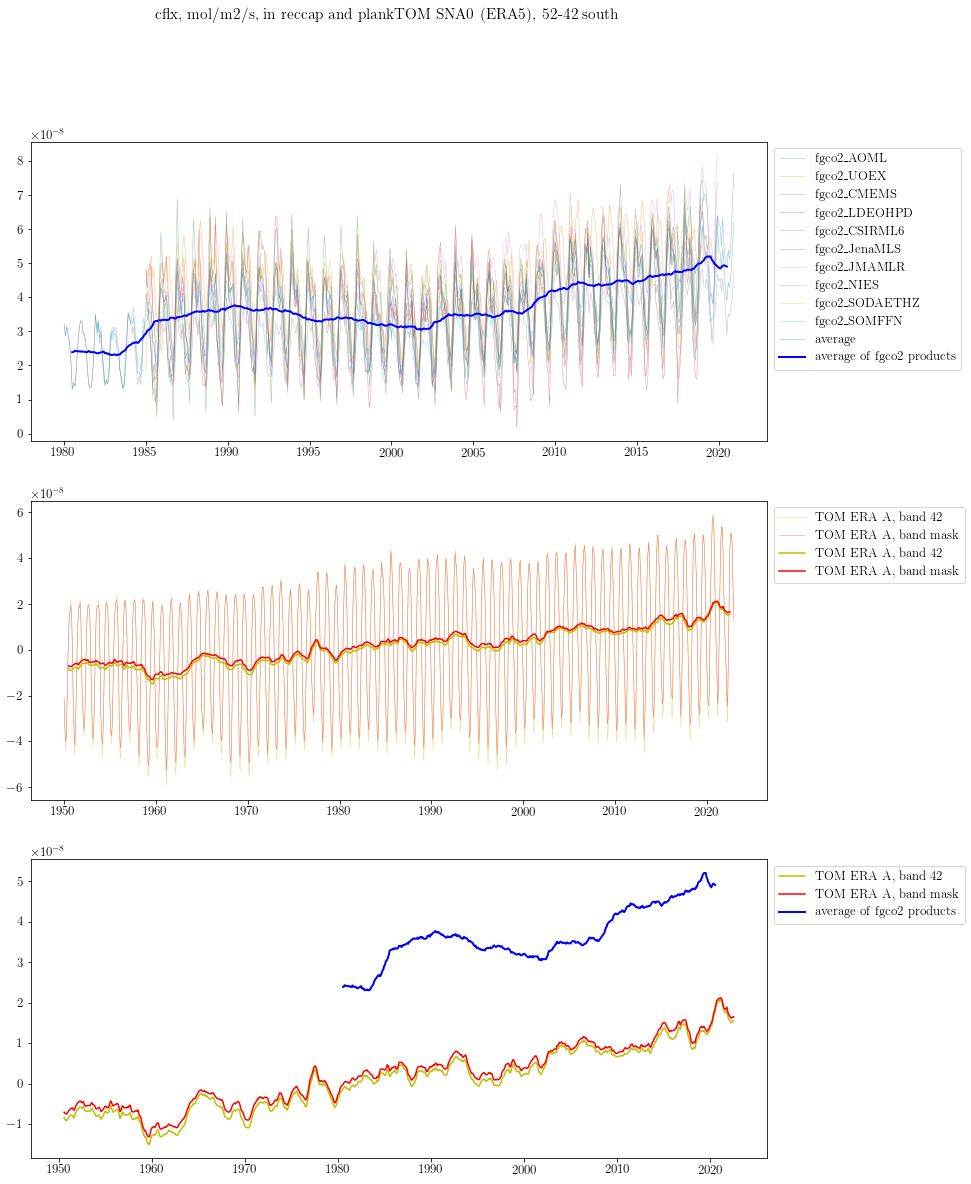

In [163]:
tdir = '/gpfs/data/greenocean/RECCAP-2/surface_co2/band_42/'

combined = xr.open_dataset(f'{tdir}/combined_fgco2_band.nc')

average = xr.concat([combined[var] for var in combined.data_vars], dim='variable').mean(dim='variable')

# Add the average as a new variable to the Dataset
combined['average'] = average

combinedr = combined.rolling(time=12, center=True).mean()

fact = 1.1
fig, axs = plt.subplots(3,1, figsize=(12*fact, 17*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

w = list(combined.data_vars)
for i in range(0,len(w)):
    axs[0].plot(combined.time, combined[w[i]], label = w[i], alpha = 0.5, linewidth = 0.5)

axs[0].plot(combinedr.time, combinedr['average'], \
         label = 'average of fgco2 products', alpha = 1, linewidth = 2, color = 'b')


sdir = '/gpfs/home/mep22dku/scratch/C14/CAL12_series_data'
tdir2 = 'SNA0'
m4 = xr.open_mfdataset(f'{sdir}/cflx_{tdir2}_1950_2022_mask_42_ts_mean.nc')
m5 = xr.open_mfdataset(f'{sdir}/cflx_{tdir2}_1950_2022_mask_band_ts_mean.nc')

m4r = m4.rolling(time_counter=12, center=True).mean()
m5r = m5.rolling(time_counter=12, center=True).mean()

axs[1].plot(m4.time_counter, m4.Cflx, color = 'y', alpha = 0.5, linewidth = 0.5, label = 'TOM ERA A, band 42')
axs[1].plot(m4.time_counter, m5.Cflx, color = 'r', alpha = 0.5, linewidth = 0.5, label = 'TOM ERA A, band mask')

axs[1].plot(m4r.time_counter, m4r.Cflx, color = 'y', linewidth = 1.5, label = 'TOM ERA A, band 42')
axs[1].plot(m4.time_counter, m5r.Cflx, color = 'r', linewidth = 1.5, label = 'TOM ERA A, band mask')

axs[0].legend(bbox_to_anchor = [1,1])
axs[1].legend(bbox_to_anchor = [1,1])


axs[2].plot(m4r.time_counter, m4r.Cflx, color = 'y', linewidth = 1.5, label = 'TOM ERA A, band 42')
axs[2].plot(m4.time_counter, m5r.Cflx, color = 'r', linewidth = 1.5, label = 'TOM ERA A, band mask')

axs[2].plot(combinedr.time, combinedr['average'], \
         label = 'average of fgco2 products', alpha = 1, linewidth = 2, color = 'b')

axs[2].legend(bbox_to_anchor = [1,1])
axs[2].legend(bbox_to_anchor = [1,1])

plt.suptitle('cflx, mol/m2/s, in reccap and plankTOM SNA0 (ERA5), 52-42 south')

In [152]:
combined = combined.drop_vars('year')

In [153]:
df = combined.to_dataframe()

In [155]:
df.to_csv('./RECCAP_fgco2_42S-52S.csv')

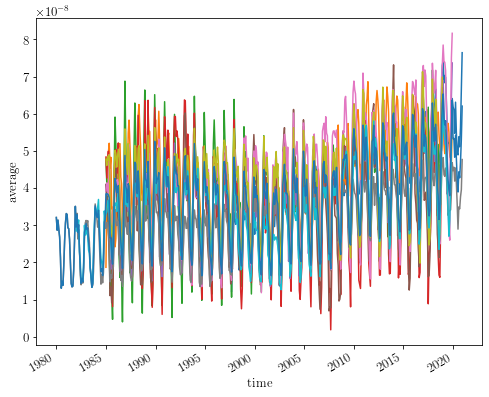

In [117]:
combined
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

for var in combined.data_vars:
    combined[var].plot(label=var)

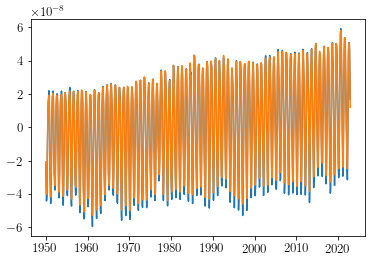

In [129]:
sdir = '/gpfs/home/mep22dku/scratch/C14/CAL12_series_data/'

tdir = 'SNA0'
m4 = xr.open_mfdataset(f'{sdir}/cflx_{tdir}_1950_2022_mask_42_ts_mean.nc')
plt.plot(m4.time_counter, m4.Cflx)
m5 = xr.open_mfdataset(f'{sdir}/cflx_{tdir}_1950_2022_mask_band_ts_mean.nc')
plt.plot(m4.time_counter, m5.Cflx)